<a href="https://colab.research.google.com/github/Moominhippo/CompNeuro/blob/main/alzheimersdata.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Dataset from https://www.kaggle.com/datasets/jboysen/mri-and-alzheimers

In [ ]:
import pandas as pd

#First, I need to separate the dementia patient data from the control group data.
#There were 100 patients over the age of 60 and 336 control subjects.

#Some subjects over the age of 60 had a clinical dementia rating (CDR) of 0.0
#which means that they are not clinically diagnosed with dementia and are also
#part of the control group.

In [ ]:
path = "/content/oasis_cross-sectional.csv"
df = pd.read_csv(path)
df.head(10)

,ID,M/F,Hand,Age,Educ,SES,MMSE,CDR,eTIV,nWBV,ASF,Delay
0,OAS1_0001_MR1,F,R,74,2.0,3.0,29.0,0.0,1344,0.743,1.306,NaN
1,OAS1_0002_MR1,F,R,55,4.0,1.0,29.0,0.0,1147,0.810,1.531,NaN
2,OAS1_0003_MR1,F,R,73,4.0,3.0,27.0,0.5,1454,0.708,1.207,NaN
3,OAS1_0004_MR1,M,R,28,NaN,NaN,NaN,NaN,1588,0.803,1.105,NaN
4,OAS1_0005_MR1,M,R,18,NaN,NaN,NaN,NaN,1737,0.848,1.010,NaN
5,OAS1_0006_MR1,F,R,24,NaN,NaN,NaN,NaN,1131,0.862,1.551,NaN
6,OAS1_0007_MR1,M,R,21,NaN,NaN,NaN,NaN,1516,0.830,1.157,NaN
7,OAS1_0009_MR1,F,R,20,NaN,NaN,NaN,NaN,1505,0.843,1.166,NaN
8,OAS1_0010_MR1,M,R,74,5.0,2.0,30.0,0.0,1636,0.689,1.073,NaN
9,OAS1_0011_MR1,F,R,52,3.0,2.0,30.0,0.0,1321,0.827,1.329,NaN


In [ ]:
rows, columns = df.shape
print(f'the dataset has {rows} rows and {columns} columns')

the dataset has 436 rows and 12 columns


In [ ]:
dementia = df[(df['CDR'] >= 0.5)]
control = df[(df['Age'] < 60) | (df['CDR'].isna()) | (df['CDR'] == 0.0)]

In [ ]:
print("Dementia patient data:")
print(dementia)
print("Control group data:")
print(control)

Dementia patient data:
                ID M/F Hand  Age  Educ  SES  MMSE  CDR  eTIV   nWBV    ASF  \
2    OAS1_0003_MR1   F    R   73   4.0  3.0  27.0  0.5  1454  0.708  1.207   
13   OAS1_0015_MR1   M    R   76   2.0  NaN  28.0  0.5  1738  0.719  1.010   
14   OAS1_0016_MR1   M    R   82   2.0  4.0  27.0  0.5  1477  0.739  1.188   
19   OAS1_0021_MR1   F    R   80   3.0  3.0  23.0  0.5  1794  0.765  0.978   
20   OAS1_0022_MR1   F    R   69   2.0  4.0  23.0  0.5  1447  0.757  1.213   
..             ...  ..  ...  ...   ...  ...   ...  ...   ...    ...    ...   
405  OAS1_0447_MR1   F    R   92   4.0  1.0  24.0  0.5  1388  0.739  1.264   
409  OAS1_0451_MR1   M    R   73   5.0  3.0  27.0  0.5  1687  0.728  1.040   
410  OAS1_0452_MR1   M    R   75   1.0  4.0  22.0  1.0  1656  0.762  1.060   
411  OAS1_0453_MR1   F    R   70   1.0  4.0  29.0  0.5  1295  0.748  1.355   
412  OAS1_0454_MR1   F    R   73   3.0  2.0  23.0  0.5  1536  0.730  1.142   

     Delay  
2      NaN  
13     NaN  
1

In [61]:
import matplotlib.pyplot as plt
import numpy as np

#Now I will compare the estimated total intracranial volume (eTIV) of dementia
#patients and the control group by plotting in a bar graph.

In [68]:
control_etiv = control['eTIV']
print("control eTIV:")
print(control_etiv)


control eTIV:
0      1344
1      1147
3      1588
4      1737
5      1131
       ... 
431    1469
432    1684
433    1580
434    1262
435    1283
Name: eTIV, Length: 336, dtype: int64


In [66]:
dementia_etiv = dementia['eTIV']
print("dementia eTIV:")
print(dementia_etiv)

dementia eTIV:
2      1454
13     1738
14     1477
19     1794
20     1447
       ... 
405    1388
409    1687
410    1656
411    1295
412    1536
Name: eTIV, Length: 100, dtype: int64


In [72]:
#mean_control_etiv = control_etiv.mean()
#print(mean_control_etiv)

1481.375


In [73]:
#mean_dementia_etiv = dementia_etiv.mean()
#print(mean_dementia_etiv)

1483.75


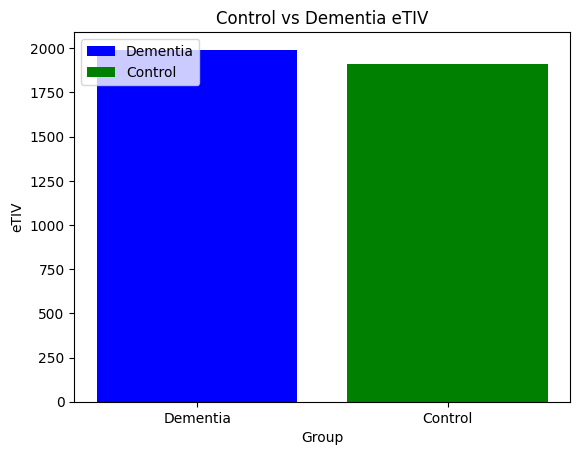

In [75]:
x_dementia = [0]*len(dementia_etiv)
x_control = [1]*len(control_etiv)

plt.bar(x_dementia, dementia['eTIV'], label='Dementia', color='blue')
plt.bar(x_control, control['eTIV'], label='Control', color='green')

plt.title('Control vs Dementia eTIV')
plt.xlabel('Group')
plt.ylabel('eTIV')
plt.xticks([0,1], ['Dementia', 'Control'])
plt.legend()
plt.show()

In [76]:
print("Dementia eTIV Descriptive Statistics:")
print(dementia['eTIV'].describe())


Dementia eTIV Descriptive Statistics:
count     100.000000
mean     1483.750000
std       168.324025
min      1171.000000
25%      1358.000000
50%      1464.000000
75%      1565.250000
max      1992.000000
Name: eTIV, dtype: float64


In [77]:
print("Control eTIV Descriptive Statistics:")
print(control['eTIV'].describe())

Control eTIV Descriptive Statistics:
count     336.000000
mean     1481.375000
std       156.033088
min      1123.000000
25%      1369.500000
50%      1478.000000
75%      1580.500000
max      1913.000000
Name: eTIV, dtype: float64


In [78]:
from scipy import stats

In [80]:
t_stat, p_value = stats.ttest_ind(dementia['eTIV'].dropna(), control['eTIV'].dropna())
print(f"T-Statistic: {t_stat}")
print(f"P-Value: {p_value}")

T-Statistic: 0.13119283311764685
P-Value: 0.8956835574282901


In [ ]:
#The estimated total intracranial volume is not statistically significant
#between the control group and Alzheimer's patients.

#Possibly due to the fact that the Alzheimer's patients are in the early stages
#and had a low CDR score.